In [2]:
# Example of LSTM to learn a sequence
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation
from keras.layers import LSTM
import matplotlib.pyplot as plt
import matplotlib
import time
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
sin = 'sinwave.csv'
df = pd.read_csv(sin,header=0,squeeze=True)
# create X/y pairs
df = concat([df.shift(1), df], axis=1)
df.dropna(inplace=True)
# convert to LSTM friendly format
values = df.values
# split data into train and test
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
X,Y = values[:,0],values[:,1]
# train, test = series[0:train_size], series[train_size:len(series)]
trainX, trainY = X[0:train_size], Y[0:train_size]
testX, testY = X[-test_size:len(values)], Y[-test_size:len(values)][:-90]
trainX,testX = trainX.reshape(len(trainX), 1, 1), testX[:-90].reshape(len(testX[:-90]), 1, 1)
shifttestY = testY[:-10]
shifttestX = testX[:-10]

In [36]:
# plt.figure()
# # testX = testX[:-93,0].reshape(len(testX[:-93,0]), 1, 1)
# # testY = testY[:-93]
# plt.plot(testY)
# print len(testY)
# plt.plot(shifttestY)
# print len(shifttestY)
# plt.show()
shifttestX.shape

(1550, 1, 1)

In [4]:
# reader for jakobs
seq_len = 1
def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'rb').read()
    data = f.decode().split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data
# X_train, y_train, X_test, y_test = load_data('sp500.csv', seq_len, True)
trainX, trainY, testX, testY = load_data('sp500.csv', seq_len, True)
shifttestY = testY[:-10]

In [ ]:
# create sequence
length = 1000
sequence = [i/float(length) for i in range(length)]
# print(sequence)
# create X/y pairs
df = DataFrame(sequence)
df = concat([df.shift(1), df], axis=1)
df.dropna(inplace=True)
# convert to LSTM friendly format
values = df.values
X, y = values[:, 0], values[:, 1]
trainX = X.reshape(len(X), 1, 1)
trainY = y
testX = trainX
testY = y
# print trainX
# print trainX.shape
print "Done with data preparation"

Fitting stateless model...
Train on 3181 samples, validate on 168 samples
Epoch 1/100
3181/3181 [==============================] - 3s - loss: 0.4132 - val_loss: 0.3922
Epoch 2/100
3181/3181 [==============================] - 0s - loss: 0.4123 - val_loss: 0.3908
Epoch 3/100
3181/3181 [==============================] - 0s - loss: 0.4112 - val_loss: 0.3894
Epoch 4/100
3181/3181 [==============================] - 0s - loss: 0.4114 - val_loss: 0.3880
Epoch 5/100
3181/3181 [==============================] - 0s - loss: 0.4086 - val_loss: 0.3865
Epoch 6/100
3181/3181 [==============================] - 0s - loss: 0.4073 - val_loss: 0.3850
Epoch 7/100
3181/3181 [==============================] - 0s - loss: 0.4043 - val_loss: 0.3836
Epoch 8/100
3181/3181 [==============================] - 0s - loss: 0.4043 - val_loss: 0.3821
Epoch 9/100
3181/3181 [==============================] - 0s - loss: 0.4022 - val_loss: 0.3807
Epoch 10/100
3181/3181 [==============================] - 0s - loss: 0.4014 - va

3181/3181 [==============================] - 0s - loss: 0.2869 - val_loss: 0.2712
Epoch 87/100
3181/3181 [==============================] - 0s - loss: 0.2864 - val_loss: 0.2697
Epoch 88/100
3181/3181 [==============================] - 0s - loss: 0.2851 - val_loss: 0.2682
Epoch 89/100
3181/3181 [==============================] - 0s - loss: 0.2840 - val_loss: 0.2666
Epoch 90/100
3181/3181 [==============================] - 0s - loss: 0.2810 - val_loss: 0.2651
Epoch 91/100
3181/3181 [==============================] - 0s - loss: 0.2796 - val_loss: 0.2635
Epoch 92/100
3181/3181 [==============================] - 0s - loss: 0.2776 - val_loss: 0.2620
Epoch 93/100
3181/3181 [==============================] - 0s - loss: 0.2747 - val_loss: 0.2604
Epoch 94/100
3181/3181 [==============================] - 0s - loss: 0.2731 - val_loss: 0.2588
Epoch 95/100
3181/3181 [==============================] - 0s - loss: 0.2721 - val_loss: 0.2572
Epoch 96/100
3181/3181 [==============================] - 0s - 

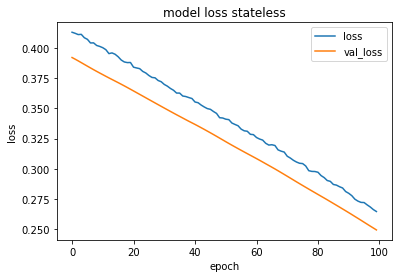

0.261273871935
Time fitting stateless: 6.513455867767334s
Fitting stateful model...
1/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
16s - loss: 0.0725 - val_loss: 0.0043
2/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
15s - loss: 0.0189 - val_loss: 0.0049
3/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
13s - loss: 0.0177 - val_loss: 0.0025
4/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
14s - loss: 0.0160 - val_loss: 0.0058
5/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
13s - loss: 0.0158 - val_loss: 0.0027
6/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
14s - loss: 0.0145 - val_loss: 0.0013
7/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
14s - loss: 0.0137 - val_loss: 0.0026
8/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1
14s - loss: 0.0139 - val_loss: 0.0012
9/10 epoch
Train on 3181 samples, validate on 168 samples
Epoch 1/1


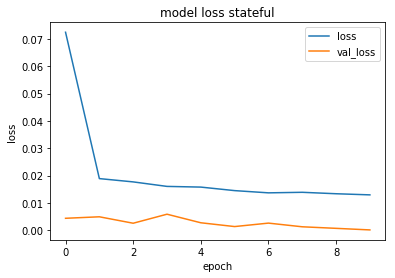

Time fitting stateless: 146.0792577266693s


In [7]:
# def plot_results(predicted_data, true_data):
#     fig = plt.figure(facecolor='white')
#     ax = fig.add_subplot(111)
#     ax.plot(true_data, label='True Data')
#     plt.plot(predicted_data, label='Prediction')
#     plt.legend()
#     plt.show()
models = {}
# trainX = X_train
# trainY = y_train
# testX = X_test
# testY = y_test
for i in range(0,2):
    state = i
    if state == 0:
        print ("Fitting stateless model...")
        d0 = time.time()
        # 1. define network STATELESS
        model = Sequential()
        model.add(LSTM(10, input_shape=(1,1)))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        # 2. compile network
        model.compile(optimizer='adam', loss='mean_squared_error')
        # 3. fit network
        history = model.fit(trainX, trainY, epochs=100, batch_size=len(trainX), verbose=1,validation_split=0.05)
        # summarize history for loss
        plt.figure()
        plt.plot(history.history['loss'],label='loss')
        plt.plot(history.history['val_loss'],label='val_loss')
        plt.title('model loss stateless')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()
        # 4. evaluate network
        loss = model.evaluate(testX, testY, verbose=0)
        print(loss)
        models['stateless'] = model
        d1 = time.time()
        dt = d1-d0
        print ("Time fitting stateless: {}s".format(dt))
    elif state == 1:
        print ("Fitting stateful model...")
        epoch = 10
        d0 = time.time()
        # 1. define network STATEFUL
        batch_size = 1
        model = Sequential()
        model.add(LSTM(10,batch_input_shape=(batch_size, 1, 1), stateful=True))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        # 2. compile network
        model.compile(optimizer='adam', loss='mean_squared_error')
        # 3. fit network
        loss = []
        val_loss = []
        for i in range(epoch):
            print ("{}/{} epoch".format(i+1,epoch))
            history = model.fit(trainX, trainY, epochs=1, batch_size=batch_size,verbose=2,shuffle=False,validation_split=0.05)
            loss.append(history.history['loss'])
            val_loss.append(history.history['val_loss'])
            model.reset_states()
        # summarize history for loss
        plt.figure()
        plt.plot(loss,label='loss')
        plt.plot(val_loss,label='val_loss')
        plt.title('model loss stateful')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()
        models['stateful'] = model
        d1 = time.time()
        dt = d1-d0
        print ("Time fitting stateless: {}s".format(dt))
    elif state == 2:
        print ("Fitting jakobs model...")
        epoch = 100
#         trainX = X_train
#         trainY = y_train
        d0 = time.time()
        # Use jakobs model
        model = Sequential()
        # add hidden lstm with 50 neurons
        model.add(LSTM(
            50,
            input_shape = (1,1),
            return_sequences = True))
        model.add(Dropout(0.2))
        # add another lstm with 100 neurons
        model.add(LSTM(
            100,
            return_sequences=False))
        model.add(Dropout(0.2))
        # output to 1 neuron
        model.add(Dense(1))
        model.add(Activation("linear"))
        # compile model
        model.compile(loss='mse',optimizer='rmsprop')
        # fit model
        history = model.fit(trainX, trainY, batch_size=32, epochs=epoch, validation_split=0.05)
        # summarize history for loss
        plt.figure()
        plt.plot(history.history['loss'],label='loss')
        plt.plot(history.history['val_loss'],label='val_loss')
        plt.title('model loss jakobs')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()   
        # save to models
        models['jakob'] = model
        d1 = time.time()
        dt = d1-d0
        print ("Time fitting jakob's: {}s".format(dt))

In [ ]:
# # Try new data pred
# import numpy as np
# length = 50
# sequence = np.arange(0.999,1.01,0.001)
# X = sequence
# X = X.reshape(len(X), 1, 1)
# testX = testX[-50:]
# testY = testY[-50:]
history.history

Stateful prediction...
[[ 0.9999859]] 0.998346054 0.993399
RMSE: 0.004947447222808932


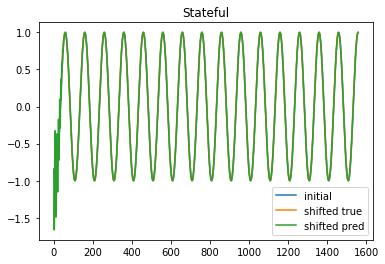

Stateless prediction...
[[ 0.9999859]] 0.998346054 0.263123
RMSE: 0.7352225715342561


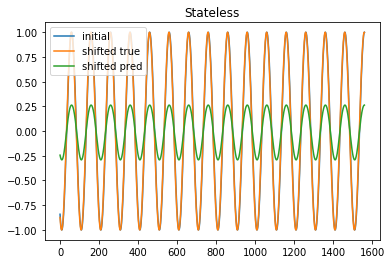

In [9]:
# 5. make predictions
from sklearn.metrics import mean_squared_error
from math import sqrt
for mod in models.keys():
    if mod == 'stateful':
        predictions = models[mod].predict(testX,batch_size=1, verbose=0)
        rmse = sqrt(mean_squared_error([testY[-1]],predictions[-1]))
        plt.figure(0)
        print ("Stateful prediction...")
        print (testX[-1],testY[-1],predictions[-1][0])
        print ("RMSE: {}".format(rmse))
        plt.title('Stateful')
        plt.plot(testX[:, 0],label='initial')
        plt.plot(testY,label='shifted true')
        plt.plot(predictions,label='shifted pred')
        plt.legend()
        plt.show()
    elif mod == 'stateless':
        predictions = models[mod].predict(testX, verbose=0)
        rmse = sqrt(mean_squared_error([testY[-1]],predictions[-1]))
        plt.figure(1)
        print ("Stateless prediction...")
        print (testX[-1],testY[-1],predictions[-1][0])
        print ("RMSE: {}".format(rmse))
        plt.title('Stateless')
        plt.plot(testX[:, 0],label='initial')
        plt.plot(testY,label='shifted true')
        plt.plot(predictions,label='shifted pred')
        plt.legend()
        plt.show()
    elif mod == 'jakob':
#         testX = X_test
#         testY = y_test
        predictions = models[mod].predict(testX)
#         predictions = np.reshape(predictions, (predictions.size,))
        rmse = sqrt(mean_squared_error([testY[-1]],predictions[-1]))
        plt.figure(3)
        print ("Jakob's prediction...")
        print (testX[-1],testY[-1],predictions[-1][0])
        print ("RMSE: {}".format(rmse))
        plt.title('Jakobs')
        plt.plot(testX[:, 0],label='initial')
        plt.plot(testY,label='shifted true')
        plt.plot(predictions,label='shifted pred')
        plt.legend()
        plt.show()
# stateful = True
# if stateful:
#     predictions = model.predict(X,batch_size=1, verbose=0)
# else:
#     predictions = model.predict(X, verbose=0)
# # print(predictions[:, 0][-10:])
# # predictions = predictions[-10:]
# print X[-1],y[-1],predictions[-1][0]
# plt.plot(X[:, 0])
# plt.plot(predictions)

Stateful prediction...
[[ 0.80588467]] 0.841470985 0.862188
RMSE: 0.1361580723944703


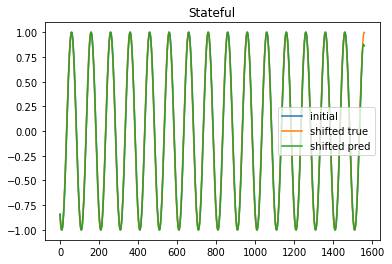

Stateless prediction...
[[ 0.80588467]] 0.841470985 0.013055
RMSE: 0.9852910796228448


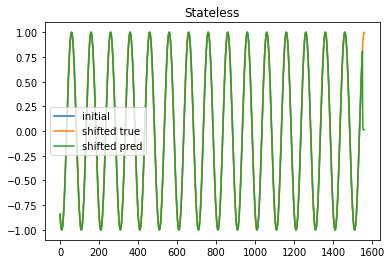

In [11]:
# 5. make predictions but shift forward n steps
from sklearn.metrics import mean_squared_error
from math import sqrt
n = 10
for mod in models.keys():
    if mod == 'stateful':
        predicted = shifttestX
        for i in range(n):
            predictions = models[mod].predict(predicted.reshape(len(predicted),1,1),batch_size=1, verbose=0)
            predicted = np.append(predicted,predictions[-1])
            rmse = sqrt(mean_squared_error([testY[-1]],predictions[-1]))
        plt.figure()
        print ("Stateful prediction...")
        print (shifttestX[-1],shifttestY[-1],predictions[-1][0])
        print ("RMSE: {}".format(rmse))
        plt.title('Stateful')
        plt.plot(shifttestX[:,0],label='initial')
        plt.plot(testY,label='shifted true')
        plt.plot(predicted,label='shifted pred')
        plt.legend()
        plt.show()
    elif mod == 'stateless':
        predicted = shifttestX
        for i in range(n):
            predictions = models[mod].predict(predicted.reshape(len(predicted),1,1), verbose=0)
            predicted = np.append(predicted,predictions[-1])
            rmse = sqrt(mean_squared_error([testY[-1]],predictions[-1]))
        plt.figure()
        print ("Stateless prediction...")
        print (shifttestX[-1],shifttestY[-1],predictions[-1][0])
        print ("RMSE: {}".format(rmse))
        plt.title('Stateless')
        plt.plot(shifttestX[:,0],label='initial')
        plt.plot(testY,label='shifted true')
        plt.plot(predicted,label='shifted pred')
        plt.legend()
        plt.show()
    elif mod == 'jakob':
        predicted = shifttestX
        # testX = X_test
        # testY = y_test
        for i in range(n):
            predictions = models[mod].predict(predicted.reshape(len(predicted),1,1))
#             print predictions[-1]
            predicted = np.append(predicted,predictions[-1])
            rmse = sqrt(mean_squared_error([testY[-1]],predictions[-1]))
        plt.figure()
        print ("Jakob's prediction...")
        print (len(predicted))
        print (shifttestX[-1],shifttestY[-1],predictions[-1][0])
        print ("RMSE: {}".format(rmse))
        plt.title('Jakobs')
        plt.plot(shifttestX[:,0],label='initial')
        plt.plot(testY,label='shifted true')
        plt.plot(predicted,label='shifted pred')
        plt.legend()
        plt.show()

In [59]:
X = np.array(0.80588467).reshape(1,1,1)
p = models['jakob'].predict(X)
print p
print X

[[ 0.81853259]]
[[[ 0.80588467]]]


Stateful prediction...50
[[ 0.80588467]] 0.841470985 0.828496
RMSE: 0.0129754229234
Stateless prediction...10
[[ 0.80588467]] 0.841470985 0.782955
RMSE: 0.0585164113687

In [ ]:
testX[:,0]

In [ ]:
plt.plot(testY,label='shifted pred')

In [ ]:
from keras.utils import plot_model
plot_model(models['stateful'], to_file='model_stateful.png',show_shapes=True)

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(models['stateful']).create(prog='dot', format='svg'))